In [38]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

## Willamette Data Source

https://waterdata.usgs.gov/usa/nwis/uv?site_no=14211720

mapper:  https://maps.waterdata.usgs.gov/mapper/index.html

In [2]:
file_name = "Resources/willamette_water.csv"

In [3]:
willamette_water_df = pd.read_csv(file_name, sep="\t")
willamette_water_df.head()

,agency_cd,site_no,datetime,tz_cd,water_temp,status_temp,oxygen,status_o2
0,USGS,14211720,01/22/2009 00:00,PST,14.1,A,4.6,A
1,USGS,14211720,01/22/2009 00:30,PST,14.2,A,4.7,A
2,USGS,14211720,01/22/2009 01:00,PST,14.2,A,4.7,A
3,USGS,14211720,01/22/2009 01:30,PST,14.1,A,4.7,A
4,USGS,14211720,01/22/2009 02:00,PST,14.1,A,4.7,A


In [4]:
willamette_water_df.dtypes

agency_cd       object
site_no          int64
datetime        object
tz_cd           object
water_temp     float64
status_temp     object
oxygen         float64
status_o2       object
dtype: object

In [5]:
willamette_water_df[willamette_water_df.isnull().values.any(axis=1)]

,agency_cd,site_no,datetime,tz_cd,water_temp,status_temp,oxygen,status_o2
1015,USGS,14211720,02/12/2009 03:30,PST,NaN,NaN,5.9,A
1026,USGS,14211720,02/12/2009 09:00,PST,NaN,NaN,5.8,A
9070,USGS,14211720,08/03/2009 00:00,PDT,9.9,A,NaN,NaN
9071,USGS,14211720,08/03/2009 00:30,PDT,9.6,A,NaN,NaN
9072,USGS,14211720,08/03/2009 01:00,PDT,9.4,A,NaN,NaN
...,...,...,...,...,...,...,...,...
192324,USGS,14211720,02/11/2020 09:00,PST,13.5,A,NaN,NaN
192325,USGS,14211720,02/11/2020 10:00,PST,NaN,NaN,7.0,A
194049,USGS,14211720,03/18/2020 09:00,PDT,12.0,A,NaN,NaN
203835,USGS,14211720,10/08/2020 09:30,PDT,NaN,NaN,16.6,P


In [6]:
#drop unnecessary columns
willamette_clean_df = willamette_water_df.dropna()
willamette_clean_df = willamette_clean_df.reset_index(drop=True)
willamette_clean_df

,agency_cd,site_no,datetime,tz_cd,water_temp,status_temp,oxygen,status_o2
0,USGS,14211720,01/22/2009 00:00,PST,14.1,A,4.6,A
1,USGS,14211720,01/22/2009 00:30,PST,14.2,A,4.7,A
2,USGS,14211720,01/22/2009 01:00,PST,14.2,A,4.7,A
3,USGS,14211720,01/22/2009 01:30,PST,14.1,A,4.7,A
4,USGS,14211720,01/22/2009 02:00,PST,14.1,A,4.7,A
...,...,...,...,...,...,...,...,...
203178,USGS,14211720,11/02/2020 16:00,PST,11.1,P,10.2,P
203179,USGS,14211720,11/02/2020 16:30,PST,11.1,P,10.2,P
203180,USGS,14211720,11/02/2020 17:00,PST,11.1,P,10.1,P
203181,USGS,14211720,11/02/2020 17:30,PST,11.0,P,10.2,P


In [7]:
willamette_reduce_df = willamette_clean_df.drop(columns=['agency_cd', 'site_no', 'tz_cd', 'status_temp', 'oxygen', 'status_o2'])
willamette_reduce_df = willamette_reduce_df.reset_index(drop=True)
willamette_reduce_df.head()

,datetime,water_temp
0,01/22/2009 00:00,14.1
1,01/22/2009 00:30,14.2
2,01/22/2009 01:00,14.2
3,01/22/2009 01:30,14.1
4,01/22/2009 02:00,14.1


In [8]:
willamette_reduce_df[['date','time']] = willamette_reduce_df['datetime'].str.split(' ', expand=True)
willamette_reduce_df = willamette_reduce_df.drop(columns=['datetime'])
willamette_reduce_df = willamette_reduce_df.reset_index(drop=True)
willamette_reduce_df.head()

,water_temp,date,time
0,14.1,01/22/2009,00:00
1,14.2,01/22/2009,00:30
2,14.2,01/22/2009,01:00
3,14.1,01/22/2009,01:30
4,14.1,01/22/2009,02:00


In [9]:
willamette_reduce_df[['month','day','Year']] = willamette_reduce_df['date'].str.split('/', expand=True)
willamette_reduce_df = willamette_reduce_df.drop(columns=['date'])
willamette_reduce_df.head()

,water_temp,time,month,day,Year
0,14.1,00:00,01,22,2009
1,14.2,00:30,01,22,2009
2,14.2,01:00,01,22,2009
3,14.1,01:30,01,22,2009
4,14.1,02:00,01,22,2009


In [10]:
willamette_reduce_df['month'] = willamette_reduce_df['month'].astype(int)
willamette_reduce_df['day'] = willamette_reduce_df['day'].astype(int)
willamette_reduce_df['Year'] = willamette_reduce_df['Year'].astype(int)

willamette_reduce_df.dtypes

water_temp    float64
time           object
month           int32
day             int32
Year            int32
dtype: object

In [11]:
willamette_reduce_final= willamette_reduce_df[(willamette_reduce_df['month'] >= 3) & (willamette_reduce_df['month'] <= 5)]
willamette_reduce_final.head()

,water_temp,time,month,day,Year
1774,13.3,00:00,3,1,2009
1775,13.2,00:30,3,1,2009
1776,13.2,01:00,3,1,2009
1777,13.2,01:30,3,1,2009
1778,13.2,02:00,3,1,2009


In [12]:
willamette_reduce_final.groupby(['Year','month']).mean()

water_temp        day
Year month                       
2009 3       12.694506  15.510431
     4       12.192917  15.500000
     5       11.587153  15.933333
2010 3       12.048053  16.436718
     4       12.043678  15.517241
     5       11.109684  15.991930
2011 3       13.233311  16.004038
     4       12.837716  15.413793
     5       11.867003  16.000000
2012 3       13.513459  16.006729
     4       12.853736  15.689655
     5       11.710013  16.000000
2013 3       12.094946  15.995957
     4       11.673889  15.500000
     5       10.590505  16.022222
2014 3       12.784522  16.009421
     4       11.806111  15.500000
     5       10.896774  16.000000
2015 3       11.525707  16.010767
     4       11.058038  15.485734
     5       10.001815  16.000000
2016 3       12.440473  15.985811
     4       10.983333  15.500000
     5       10.246397  16.012121
2017 3       13.156124  16.005384
     4       12.289360  15.496523
     5       11.358871  16.000000
2018 3       12.457604  16.006729
     4       12.028193  15.551291
     5       10.867295  16.002692
2019 3       12.707402  16.008075
     4       12.214585  15.466853
     5       10.424462  16.000000
2020 3       11.724966  16.005398
     4       11.300625  15.500000
     5       10.562030  16.000000

## Columbia Washougal Data Source

https://waterdata.usgs.gov/usa/nwis/uv?site_no=453439122223900

mapper: https://maps.waterdata.usgs.gov/mapper/index.html


In [13]:
file_name2 = "Resources/columbia_washougal.csv"
columbia_washougal_water_df = pd.read_csv(file_name2, sep="\t")
columbia_washougal_water_df

,agency_cd,site_no,datetime,tz_cd,temperature_c,status_temp,barometric,status_barometric,pressure_gas,status_pressure_gas
0,USGS,453439122223900,2008-02-28 00:00,PST,5.2,A,769,A,799,A
1,USGS,453439122223900,2008-02-28 01:00,PST,5.2,A,769,A,798,A
2,USGS,453439122223900,2008-02-28 02:00,PST,5.2,A,769,A,797,A
3,USGS,453439122223900,2008-02-28 03:00,PST,5.1,A,769,A,796,A
4,USGS,453439122223900,2008-02-28 04:00,PST,5.1,A,769,A,795,A
...,...,...,...,...,...,...,...,...,...,...
60300,USGS,453439122223900,2020-09-24 08:00,PDT,18.8,A,762,A,760,A
60301,USGS,453439122223900,2020-09-24 09:00,PDT,18.8,A,762,A,760,A
60302,USGS,453439122223900,2020-09-24 10:00,PDT,18.8,A,762,A,762,A
60303,USGS,453439122223900,2020-09-24 11:00,PDT,18.8,A,762,A,764,A


## Columbia Dodson Data Source

https://waterdata.usgs.gov/usa/nwis/uv?site_no=453630122021400

mapper: https://maps.waterdata.usgs.gov/mapper/index.html

In [14]:
file_name2 = "Resources/columbia_dodson.csv"
columbia_dodson_water_df = pd.read_csv(file_name2, sep="\t")
columbia_dodson_water_df

,agency_cd,site_no,datetime,tz_cd,temperature_c,status_temp,barometric,status_barmetric,pressure_gas,status_pressure_gas
0,USGS,453630122021400,2007-10-01 01:00,PDT,17.3,A,760.0,A,769.0,A
1,USGS,453630122021400,2007-10-01 02:00,PDT,17.2,A,761.0,A,767.0,A
2,USGS,453630122021400,2007-10-01 03:00,PDT,17.1,A,761.0,A,765.0,A
3,USGS,453630122021400,2007-10-01 04:00,PDT,17.1,A,762.0,A,764.0,A
4,USGS,453630122021400,2007-10-01 05:00,PDT,17.0,A,762.0,A,762.0,A
...,...,...,...,...,...,...,...,...,...,...
106709,USGS,453630122021400,2020-11-04 09:00,PST,12.8,P,765.0,P,763.0,P
106710,USGS,453630122021400,2020-11-04 10:00,PST,12.8,P,765.0,P,764.0,P
106711,USGS,453630122021400,2020-11-04 11:00,PST,12.8,P,765.0,P,763.0,P
106712,USGS,453630122021400,2020-11-04 12:00,PST,12.9,P,765.0,P,764.0,P


## Columbia Bonneville Forebay Data Source

https://waterdata.usgs.gov/usa/nwis/uv?site_no=453845121562000

mapper: https://maps.waterdata.usgs.gov/mapper/index.html

In [15]:
file_name2 = "Resources/columbia_bonneville_forebay.csv"
columbia_bonneville_forebay_water_df = pd.read_csv(file_name2, sep="\t")
columbia_bonneville_forebay_water_df

,agency_cd,site_no,datetime,tz_cd,temperature_c,status_temp,barometric,status_barmetric,pressure_gas,status_pressure_gas
0,USGS,453845121562000,2008-02-28 00:00,PST,5.1,A,766,A,792,A
1,USGS,453845121562000,2008-02-28 01:00,PST,5.1,A,766,A,792,A
2,USGS,453845121562000,2008-02-28 02:00,PST,5.0,A,767,A,792,A
3,USGS,453845121562000,2008-02-28 03:00,PST,5.0,A,766,A,791,A
4,USGS,453845121562000,2008-02-28 04:00,PST,5.0,A,766,A,791,A
...,...,...,...,...,...,...,...,...,...,...
58958,USGS,453845121562000,2020-09-24 06:00,PDT,19.1,P,759,A,763,A
58959,USGS,453845121562000,2020-09-24 07:00,PDT,19.1,P,759,A,763,A
58960,USGS,453845121562000,2020-09-24 08:00,PDT,19.1,P,760,A,763,A
58961,USGS,453845121562000,2020-09-24 09:00,PDT,19.1,P,760,A,762,A


## Columbia River Commercial Fishing Data Source

https://www.dfw.state.or.us/fish/oscrp/crm/comm_fishery_updates_20.asp


In [16]:
file_name2 = "Resources/columbia_commercial_fishing_counts.csv"
columbia_commercial_fishing_water_df = pd.read_csv(file_name2)
columbia_commercial_fishing_water_df

,Year,Main Stream,Youngs Bay,Blind Slough,Tongue Point,Deep River
0,2003,0,4947,2029,345,0
1,2004,0,5611,3240,0,0
2,2005,0,730,1331,0,60
3,2006,4350,4730,1252,0,28
4,2007,2756,4070,1451,0,29
5,2008,5938,1937,953,259,28
6,2009,4150,1985,706,133,82
7,2010,9024,18755,2680,727,175
8,2011,4448,6851,1487,656,81
9,2012,6141,6006,916,500,38


In [17]:
file_name2 = "Resources/Columbia_bonne-below.csv"
Columbia_bonne_below_df = pd.read_csv(file_name2, sep="\t")
Columbia_bonne_below_df

,agency_cd,site_no,datetime,Gage_Max,Status_Gage_Max,Gage_Min,Status_Gage_Min,Gage_Mean,Status_Gage_Mean
0,USGS,14128870,2000-01-01,15.97,A,14.21,A,15.00,A
1,USGS,14128870,2000-01-02,17.87,A,14.33,A,16.33,A
2,USGS,14128870,2000-01-03,19.86,A,15.99,A,17.40,A
3,USGS,14128870,2000-01-04,19.04,A,16.16,A,17.49,A
4,USGS,14128870,2000-01-05,19.24,A,15.70,A,17.02,A
...,...,...,...,...,...,...,...,...,...
7607,USGS,14128870,2020-10-29,12.39,P,10.08,P,10.86,P
7608,USGS,14128870,2020-10-30,10.09,P,7.77,P,8.96,P
7609,USGS,14128870,2020-10-31,9.90,P,7.38,P,8.87,P
7610,USGS,14128870,2020-11-01,12.10,P,9.36,P,11.50,P


In [18]:
file_name2 = "Resources/Columbia_bonne_stevenson.csv"
Columbia_bonne_stevenson_df = pd.read_csv(file_name2, sep="\t")
Columbia_bonne_stevenson_df

,agency_cd,site_no,datetime,Gage_Max,Status_Gage_Max,Gage_min,Status_gage_min,Gage_Mean,Status_Gage_Mean
0,USGS,14128600,2008-10-01,76.23,A,75.93,A,76.05,A
1,USGS,14128600,2008-10-02,76.33,A,76.03,A,76.21,A
2,USGS,14128600,2008-10-03,76.53,A,76.03,A,76.33,A
3,USGS,14128600,2008-10-04,76.33,A,76.03,A,76.11,A
4,USGS,14128600,2008-10-05,76.43,A,76.13,A,76.31,A
...,...,...,...,...,...,...,...,...,...
4412,USGS,14128600,2020-10-30,73.59,P,72.70,P,72.95,P
4413,USGS,14128600,2020-10-31,75.11,P,73.59,P,74.44,P
4414,USGS,14128600,2020-11-01,75.13,P,74.30,P,74.58,P
4415,USGS,14128600,2020-11-02,74.67,P,74.07,P,74.30,P


In [19]:
#read in willamette gage
w_merge_file = "Resources/willamette_water_gage.csv"

In [20]:
#create willamette gage df
willamette_gage_df = pd.read_csv(w_merge_file, sep="\t")
willamette_gage_df.head()

,agency_cd,site_no,datetime,tz_cd,gage_height_ft,gage_status,temp,temp_status
0,USGS,14211720,10/01/2007 01:00,PDT,3.21,A,NaN,NaN
1,USGS,14211720,10/01/2007 01:30,PDT,3.12,A,NaN,NaN
2,USGS,14211720,10/01/2007 02:00,PDT,2.89,A,NaN,NaN
3,USGS,14211720,10/01/2007 02:30,PDT,2.65,A,NaN,NaN
4,USGS,14211720,10/01/2007 03:00,PDT,2.38,A,NaN,NaN


In [21]:
#drop unnecessary columns
willamette_gage_df = willamette_gage_df.dropna()
willamette_gage_df = willamette_gage_df.reset_index(drop=True)
willamette_gage_df

,agency_cd,site_no,datetime,tz_cd,gage_height_ft,gage_status,temp,temp_status
0,USGS,14211720,01/22/2009 00:00,PST,4.30,A,4.6,A
1,USGS,14211720,01/22/2009 00:30,PST,4.31,A,4.7,A
2,USGS,14211720,01/22/2009 01:00,PST,4.31,A,4.7,A
3,USGS,14211720,01/22/2009 01:30,PST,4.41,A,4.7,A
4,USGS,14211720,01/22/2009 02:00,PST,4.53,A,4.7,A
...,...,...,...,...,...,...,...,...
203033,USGS,14211720,11/04/2020 16:00,PST,3.02,P,10.7,P
203034,USGS,14211720,11/04/2020 16:30,PST,3.48,P,10.7,P
203035,USGS,14211720,11/04/2020 17:00,PST,4.04,P,10.7,P
203036,USGS,14211720,11/04/2020 17:30,PST,4.65,P,10.7,P


In [22]:
#clean df
willamette_gage_df = willamette_gage_df.drop(columns=['agency_cd', 'tz_cd', 'gage_status', 'temp_status'])
willamette_gage_df.head()

,site_no,datetime,gage_height_ft,temp
0,14211720,01/22/2009 00:00,4.30,4.6
1,14211720,01/22/2009 00:30,4.31,4.7
2,14211720,01/22/2009 01:00,4.31,4.7
3,14211720,01/22/2009 01:30,4.41,4.7
4,14211720,01/22/2009 02:00,4.53,4.7


In [23]:
#split datetime
willamette_gage_df[['date','time']] = willamette_gage_df['datetime'].str.split(' ', expand=True)
willamette_gage_df = willamette_gage_df.drop(columns=['datetime'])
willamette_gage_df = willamette_gage_df.reset_index(drop=True)
willamette_gage_df.head()

,site_no,gage_height_ft,temp,date,time
0,14211720,4.30,4.6,01/22/2009,00:00
1,14211720,4.31,4.7,01/22/2009,00:30
2,14211720,4.31,4.7,01/22/2009,01:00
3,14211720,4.41,4.7,01/22/2009,01:30
4,14211720,4.53,4.7,01/22/2009,02:00


In [24]:
#split date
willamette_gage_df[['month','day','Year']] = willamette_gage_df['date'].str.split('/', expand=True)
willamette_gage_df = willamette_gage_df.drop(columns=['date'])
willamette_gage_df.head()

,site_no,gage_height_ft,temp,time,month,day,Year
0,14211720,4.30,4.6,00:00,01,22,2009
1,14211720,4.31,4.7,00:30,01,22,2009
2,14211720,4.31,4.7,01:00,01,22,2009
3,14211720,4.41,4.7,01:30,01,22,2009
4,14211720,4.53,4.7,02:00,01,22,2009


In [25]:
willamette_gage_df['month'] = willamette_gage_df['month'].astype(int)
willamette_gage_df['day'] = willamette_gage_df['day'].astype(int)
willamette_gage_df['Year'] = willamette_gage_df['Year'].astype(int)

willamette_gage_df.dtypes

site_no             int64
gage_height_ft    float64
temp              float64
time               object
month               int32
day                 int32
Year                int32
dtype: object

In [26]:
willamette_gage_final= willamette_gage_df[(willamette_gage_df['month'] >= 3) & (willamette_gage_df['month'] <= 5)]
willamette_gage_final.head()

,site_no,gage_height_ft,temp,time,month,day,Year
1776,14211720,4.31,6.6,00:00,3,1,2009
1777,14211720,4.15,6.6,00:30,3,1,2009
1778,14211720,3.99,6.6,01:00,3,1,2009
1779,14211720,3.81,6.6,01:30,3,1,2009
1780,14211720,3.70,6.6,02:00,3,1,2009


In [27]:
willamette_gage_final = willamette_gage_final.groupby(['Year']).mean()
willamette_gage_final

,site_no,gage_height_ft,temp,month,day
Year,,,,,
2009,14211720,6.329968,10.153672,4.000695,15.648135
2010,14211720,4.833822,10.735210,4.011350,15.987028
2011,14211720,10.236951,9.533448,3.998163,15.795225
2012,14211720,10.390069,9.898923,4.000458,15.903344
2013,14211720,6.148852,11.589431,4.000227,15.842822
2014,14211720,8.795886,11.539873,4.000453,15.840054
2015,14211720,4.907156,13.215941,4.000227,15.835147
2016,14211720,7.401407,12.624575,4.001135,15.837304
2017,14211720,13.404161,10.525544,4.000453,15.837715


In [28]:
willamette_gage_final = willamette_gage_final.drop(columns=['month', 'day'])


In [29]:
willamette_gage_final['temp_f'] = willamette_gage_final['temp'] * 1.8 + 32
willamette_gage_final = willamette_gage_final.drop(columns=['temp'])
willamette_gage_final

,site_no,gage_height_ft,temp_f
Year,,,
2009,14211720,6.329968,50.276609
2010,14211720,4.833822,51.323377
2011,14211720,10.236951,49.160207
2012,14211720,10.390069,49.818062
2013,14211720,6.148852,52.860975
2014,14211720,8.795886,52.771772
2015,14211720,4.907156,55.788694
2016,14211720,7.401407,54.724234
2017,14211720,13.404161,50.945979


In [30]:
# Read in Willamette Dam Spring Chinook Counts
willamette_file = "Resources/Chinook_Willamette_Counts.csv"

# Grab only the columns we want
willamette_salmon_df = pd.read_csv(willamette_file, usecols=["Project","Year","Dates", "Chinook"])

# Make sure we only get 2000 to 2020
willamette_salmon_df =  willamette_salmon_df[ 
    (willamette_salmon_df["Year"] > 1999) & 
    (willamette_salmon_df["Year"] < 2021)
]

# Clean up data types
willamette_salmon_df["Year"] = willamette_salmon_df["Year"].astype('int')
willamette_salmon_df["Chinook"] = willamette_salmon_df["Chinook"].astype('int')

willamette_salmon_df

,Project,Year,Dates,Chinook
0,Willamette Falls,2000,3/15 - 5/31,32475
1,Willamette Falls,2001,3/15 - 5/31,41417
2,Willamette Falls,2002,3/15 - 5/31,57163
3,Willamette Falls,2003,3/15 - 5/31,69118
4,Willamette Falls,2004,3/15 - 5/31,81837
5,Willamette Falls,2005,3/15 - 5/31,26956
6,Willamette Falls,2006,3/15 - 5/31,25217
7,Willamette Falls,2007,3/15 - 5/31,16559
8,Willamette Falls,2008,3/15 - 5/31,5679
9,Willamette Falls,2009,3/15 - 5/31,17057


In [31]:
willamette_mean_df = willamette_gage_final.drop(columns="temp_f")
willamette_mean_df

,site_no,gage_height_ft
Year,,
2009,14211720,6.329968
2010,14211720,4.833822
2011,14211720,10.236951
2012,14211720,10.390069
2013,14211720,6.148852
2014,14211720,8.795886
2015,14211720,4.907156
2016,14211720,7.401407
2017,14211720,13.404161


In [32]:
merged_willamette_salmon_mean_df = pd.merge(willamette_salmon_df, willamette_mean_df, on="Year")
merged_willamette_salmon_mean_df = merged_willamette_salmon_mean_df.drop(columns='site_no')
merged_willamette_salmon_mean_df

,Project,Year,Dates,Chinook,gage_height_ft
0,Willamette Falls,2009,3/15 - 5/31,17057,6.329968
1,Willamette Falls,2010,3/15 - 5/31,43661,4.833822
2,Willamette Falls,2011,3/15 - 5/31,18970,10.236951
3,Willamette Falls,2012,3/15 - 5/31,20761,10.390069
4,Willamette Falls,2013,3/15 - 5/31,17821,6.148852
5,Willamette Falls,2014,3/15 - 5/31,19671,8.795886
6,Willamette Falls,2015,3/15 - 5/31,44169,4.907156
7,Willamette Falls,2016,3/15 - 5/31,16836,7.401407
8,Willamette Falls,2017,3/15 - 5/31,17483,13.404161
9,Willamette Falls,2018,3/15 - 5/31,15256,9.166749


The r-value is: -0.4637390208434601
The r2-value is: 0.2150538794528511
The p-value is: 0.12888150994310013


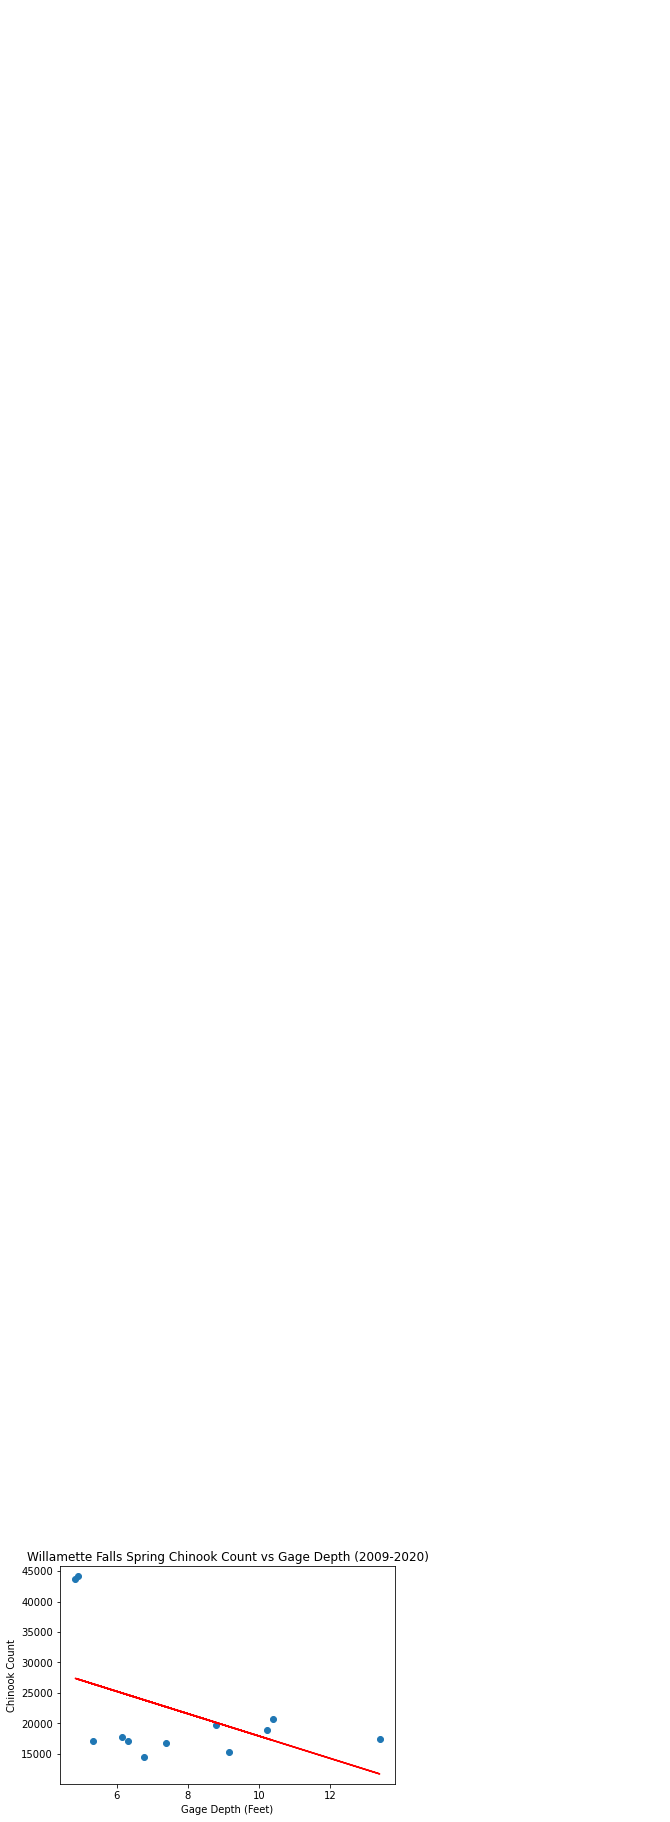

In [33]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(merged_willamette_salmon_mean_df["gage_height_ft"], 
                                                      merged_willamette_salmon_mean_df["Chinook"])
regress_values = merged_willamette_salmon_mean_df["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(merged_willamette_salmon_mean_df["gage_height_ft"], regress_values, "r-")
ax.scatter(merged_willamette_salmon_mean_df["gage_height_ft"],merged_willamette_salmon_mean_df["Chinook"])

In [34]:
willamette_temp_df = willamette_gage_final.drop(columns="gage_height_ft")
willamette_temp_df

,site_no,temp_f
Year,,
2009,14211720,50.276609
2010,14211720,51.323377
2011,14211720,49.160207
2012,14211720,49.818062
2013,14211720,52.860975
2014,14211720,52.771772
2015,14211720,55.788694
2016,14211720,54.724234
2017,14211720,50.945979


In [35]:
merged_willamette_salmon_temp_df = pd.merge(willamette_salmon_df, willamette_temp_df, on="Year")
merged_willamette_salmon_temp_df = merged_willamette_salmon_temp_df.drop(columns='site_no')
merged_willamette_salmon_temp_df

,Project,Year,Dates,Chinook,temp_f
0,Willamette Falls,2009,3/15 - 5/31,17057,50.276609
1,Willamette Falls,2010,3/15 - 5/31,43661,51.323377
2,Willamette Falls,2011,3/15 - 5/31,18970,49.160207
3,Willamette Falls,2012,3/15 - 5/31,20761,49.818062
4,Willamette Falls,2013,3/15 - 5/31,17821,52.860975
5,Willamette Falls,2014,3/15 - 5/31,19671,52.771772
6,Willamette Falls,2015,3/15 - 5/31,44169,55.788694
7,Willamette Falls,2016,3/15 - 5/31,16836,54.724234
8,Willamette Falls,2017,3/15 - 5/31,17483,50.945979
9,Willamette Falls,2018,3/15 - 5/31,15256,52.533403


The r-value is: 0.28805660101776026
The r2-value is: 0.08297660538990512
The p-value is: 0.3639097578067054


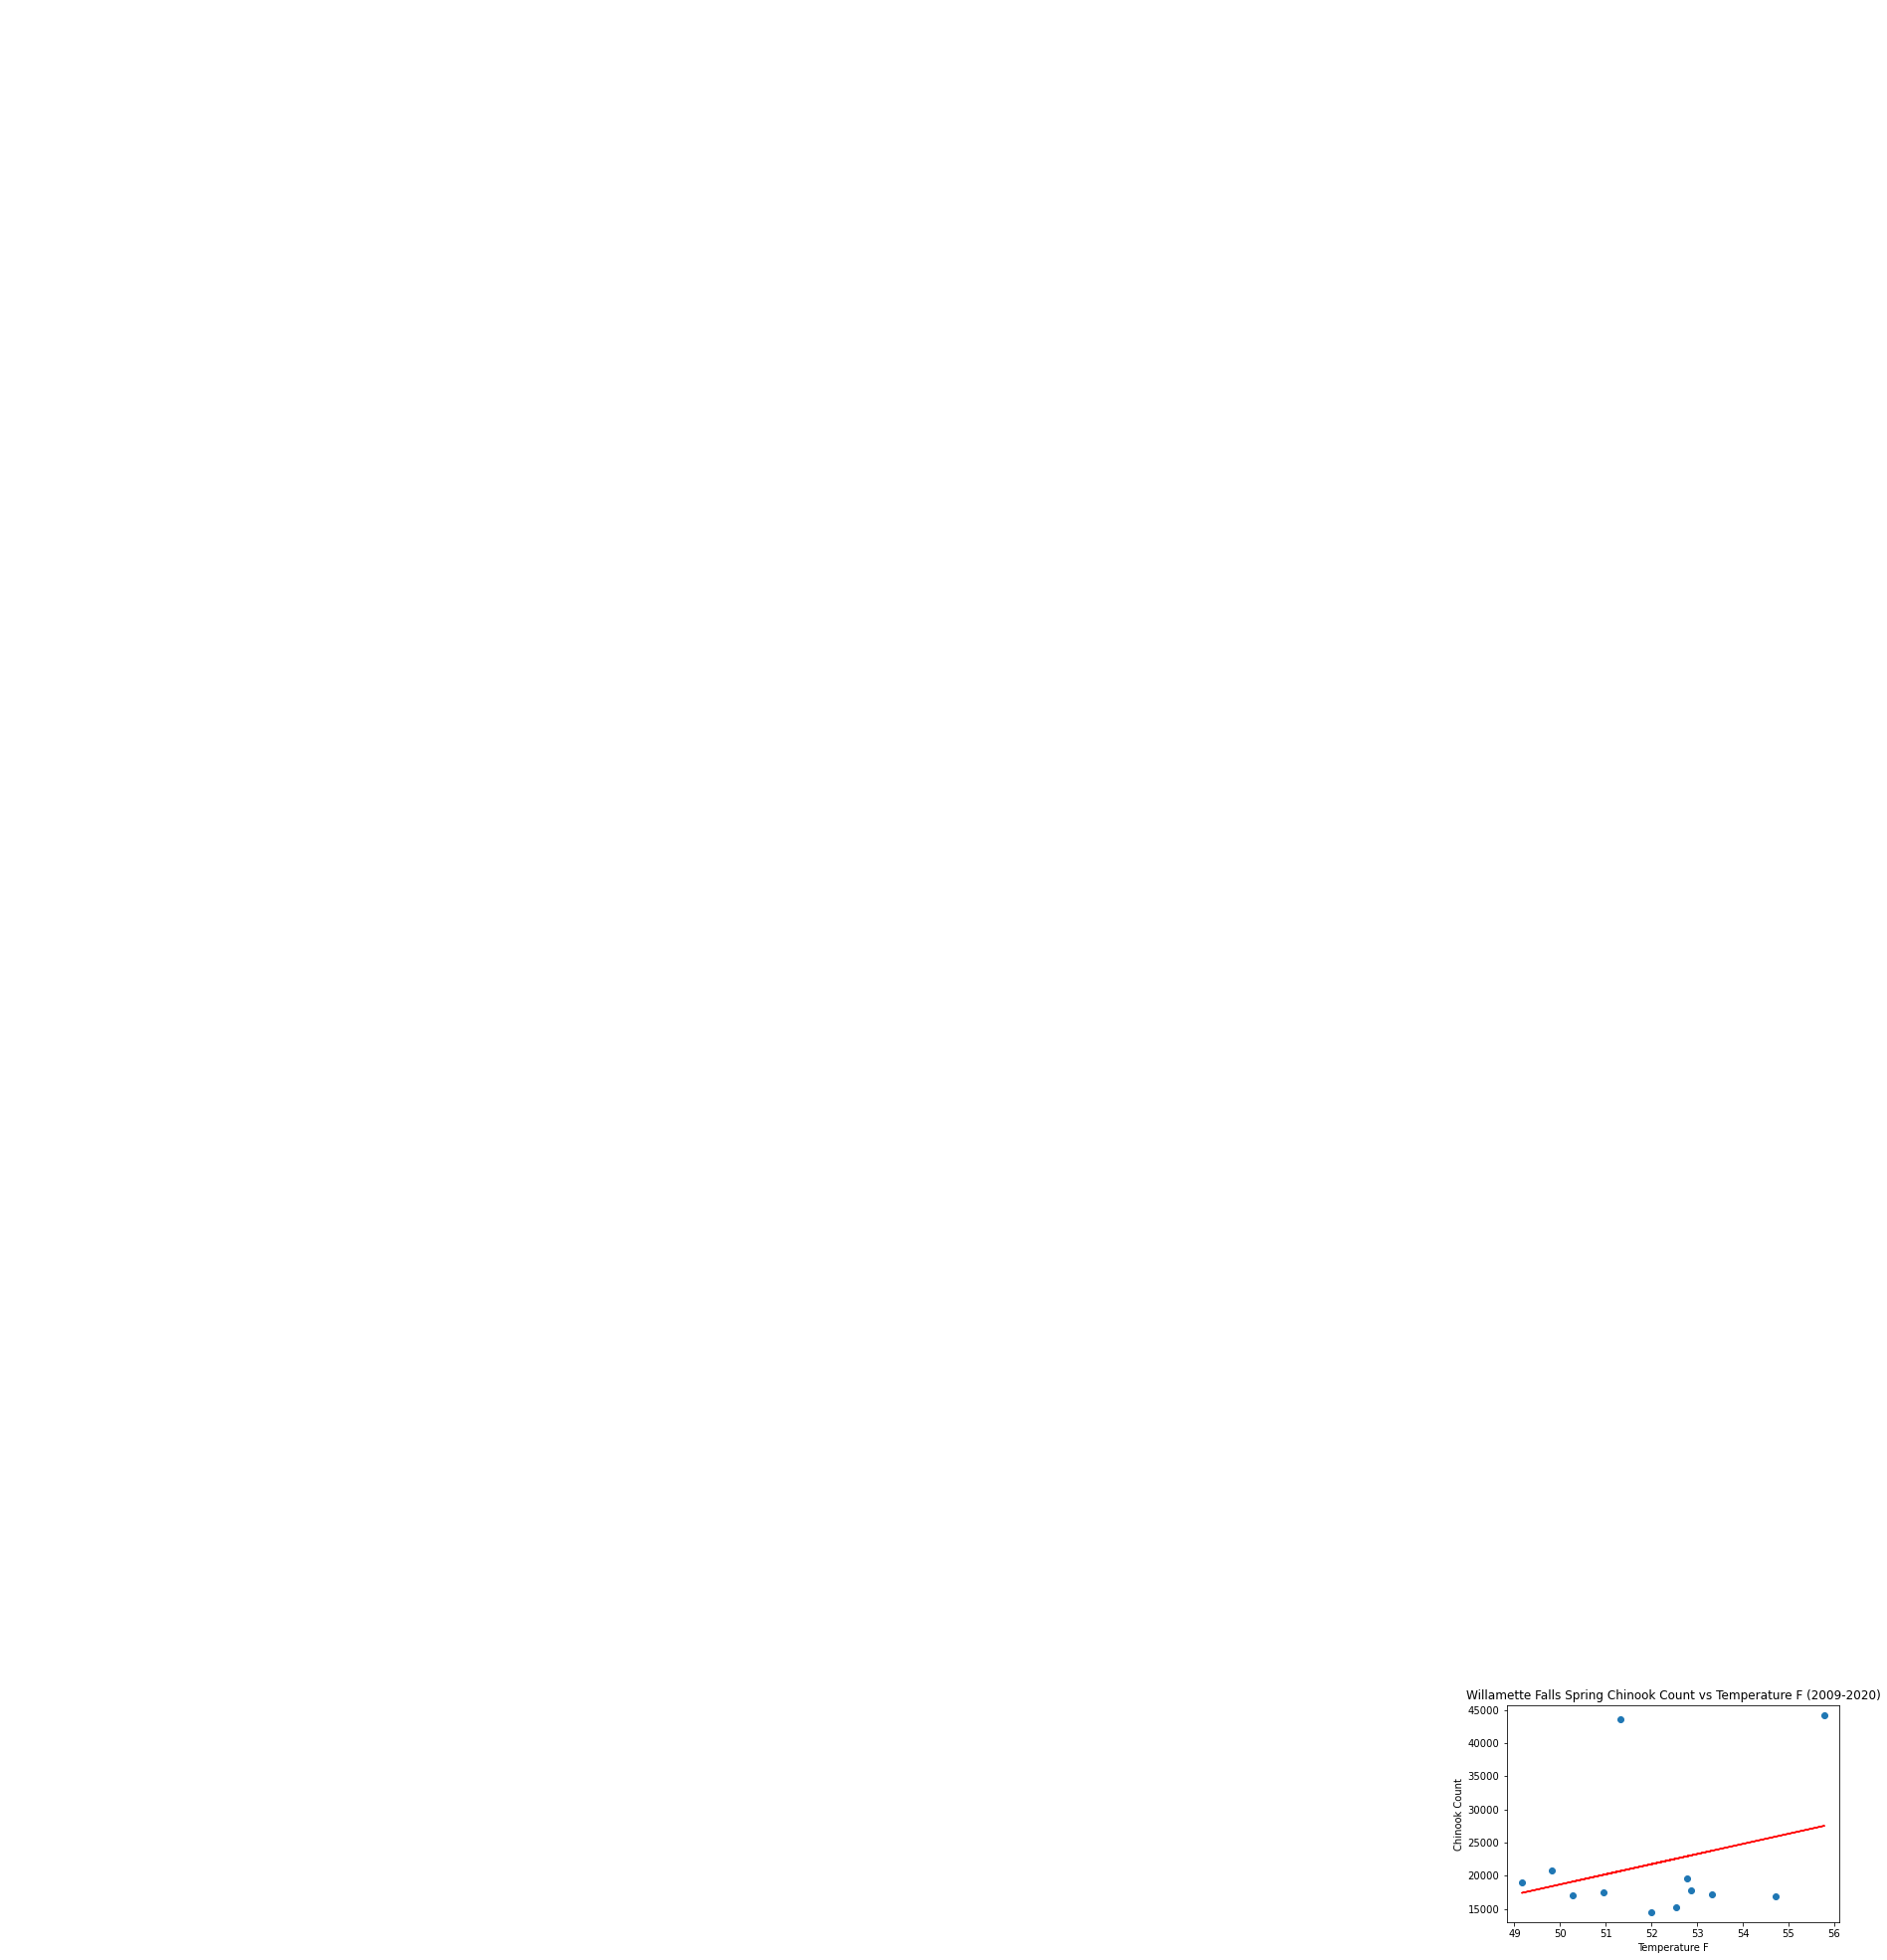

In [36]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(merged_willamette_salmon_temp_df["temp_f"], 
                                                      merged_willamette_salmon_temp_df["Chinook"])
regress_values = merged_willamette_salmon_temp_df["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Temperature F")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Count vs Temperature F (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(merged_willamette_salmon_temp_df["temp_f"], regress_values, "r-")
ax.scatter(merged_willamette_salmon_temp_df["temp_f"],merged_willamette_salmon_temp_df["Chinook"])

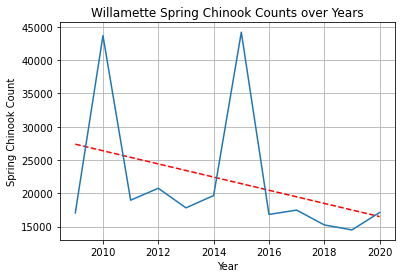

In [39]:
# Calculate a trend line
z = np.polyfit(merged_willamette_salmon_temp_df["Year"], merged_willamette_salmon_temp_df["Chinook"], 1)
p = np.poly1d(z)

# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Spring Chinook Counts over Years")
ax.grid(True)
ax.plot(merged_willamette_salmon_temp_df["Year"],p(merged_willamette_salmon_temp_df["Year"]),"r--")
ax.plot(merged_willamette_salmon_temp_df["Year"], merged_willamette_salmon_temp_df["Chinook"] )